In [1]:
import fastf1
import fastf1.api
import fastf1.plotting

import pandas as pd
import numpy as np
import os  
from datetime import timedelta
import csv
import seaborn as sns
from fastf1.ergast import Ergast

ergast = Ergast()

year = 2025
race_number = 11
race_session = 'R'
Lap_Number = 31

#year = int(input("Year ? "))
#race_number = int(input("Race Number ? (1-24) "))
#race_session = input('Session ?  (S, R) ')

session= fastf1.get_session(year, race_number, race_session)
session.load()

pit = ergast.get_pit_stops(season = year, round = race_number )
teams = fastf1.plotting.list_team_names(session)
event_name = session.event.EventName

/home/kurios/Documents/f1_analysis/f1_analysis_env/lib/python3.10/site-packages/fastf1/api.py:32: UserWarning: `fastf1.api` will be considered private in future releases and potentially be removed or changed!
  warnings.warn("`fastf1.api` will be considered private in future releases and "
req         WARNING 	DEFAULT CACHE ENABLED! (29.21 GB) /home/kurios/.cache/fastf1
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for

In [12]:
def get_sorted_first_position_times(session):
    all_first_position_times = []

    for driver in session.drivers:
        driver_lap = session.laps.pick_drivers(driver)
        first_position_times_for_driver = driver_lap.Time[driver_lap.Position == 1]
        all_first_position_times.extend(first_position_times_for_driver.tolist())

    all_first_position_times.sort()

    return all_first_position_times
sorted_times = get_sorted_first_position_times(session)

EACH DRIVER

In [ ]:
first_driver = session.laps.pick_drivers(session.drivers).pick_laps(Lap_Number + 1)
first_driver = first_driver[first_driver['Position'] == 1]

'''
potential_laps_after_leader = driver_laps[(driver_laps['Time'] >= leader_lap_time_reference)].copy()
selected_lap = None
if not potential_laps_after_leader.empty:
    selected_lap = potential_laps_after_leader.sort_values(by='LapNumber').iloc[0]
'''
i = np.argmin(np.abs(df.index.to_pydatetime() - first_driver['Time']))

array([6638058000000], dtype='timedelta64[ns]')

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Direction,Time_sec
100,01:40:28.988,30.6,31,943.1,False,49.3,50,1.8,NE,6028.988
110,01:50:29.017,30.5,31,943.0,False,48.7,54,2.8,NE,6629.017
120,02:00:29.015,30.8,31,942.9,False,49.3,35,0.7,NE,7229.015


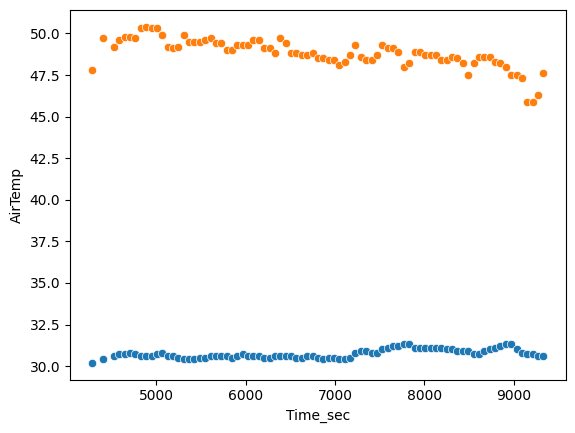

In [ ]:
def get_wind_direction_cat(WindDirection):
    normalized_direction = WindDirection % 360
    if normalized_direction < 0:
        normalized_direction += 360
    match normalized_direction:
        case _ if (normalized_direction >= 348.75 or normalized_direction < 11.25):
            return 'N'
        case _ if (normalized_direction >= 11.25 and normalized_direction < 33.75):
            return 'NNE'
        case _ if (normalized_direction >= 33.75 and normalized_direction < 56.25):
            return 'NE'
        case _ if (normalized_direction >= 56.25 and normalized_direction < 78.75):
            return 'ENE'
        case _ if (normalized_direction >= 78.75 and normalized_direction < 101.25):
            return 'E'
        case _ if (normalized_direction >= 101.25 and normalized_direction < 123.75):
            return 'ESE'
        case _ if (normalized_direction >= 123.75 and normalized_direction < 146.25):
            return 'SE'
        case _ if (normalized_direction >= 146.25 and normalized_direction < 168.75):
            return 'SSE'
        case _ if (normalized_direction >= 168.75 and normalized_direction < 191.25):
            return 'S'
        case _ if (normalized_direction >= 191.25 and normalized_direction < 213.75):
            return 'SSW'
        case _ if (normalized_direction >= 213.75 and normalized_direction < 236.25):
            return 'SW'
        case _ if (normalized_direction >= 236.25 and normalized_direction < 258.75):
            return 'WSW'
        case _ if (normalized_direction >= 258.75 and normalized_direction < 281.25):
            return 'W'
        case _ if (normalized_direction >= 281.25 and normalized_direction < 303.75):
            return 'WNW'
        case _ if (normalized_direction >= 303.75 and normalized_direction < 326.25):
            return 'NW'
        case _ if (normalized_direction >= 326.25 and normalized_direction < 348.75):
            return 'NNW'
        case _:
            return 'Invalid'

first_driver = session.laps.pick_drivers(session.drivers).pick_laps(Lap_Number + 1)
first_driver = first_driver[first_driver['Position'] == 1]
weather_driver_lap = session.laps.get_weather_data()
weather_driver_lap = weather_driver_lap.drop_duplicates()
weather_driver_lap = weather_driver_lap.sort_values(['Time'])
weather_driver_lap['Direction'] = weather_driver_lap['WindDirection'].apply(get_wind_direction_cat)
weather_driver_lap['Time_sec'] = weather_driver_lap.Time.dt.total_seconds()
weather_evolution = [weather_driver_lap.loc[(weather_driver_lap.Time_sec - (first_driver['Time']-timedelta(minutes=10)).iloc[0].total_seconds()).abs().idxmin()],
                     weather_driver_lap.loc[(weather_driver_lap.Time_sec - first_driver['Time'].iloc[0].total_seconds()).abs().idxmin()],
                      weather_driver_lap.loc[(weather_driver_lap.Time_sec - (first_driver['Time']+timedelta(minutes=10)).iloc[0].total_seconds()).abs().idxmin()]]
weather_evolution_df = pd.DataFrame(weather_evolution)
weather_evolution_df.Time = weather_evolution_df.Time.astype('str').str[7:-3]
weather_evolution_df.Humidity = weather_evolution_df.Humidity.astype('int')
sns.scatterplot(data = weather_driver_lap, x='Time_sec', y='AirTemp')
sns.scatterplot(data = weather_driver_lap, x='Time_sec', y='TrackTemp')
weather_evolution_df

CURENT STATUS

In [ ]:

def is_personal_best(s, column):
    best= []
    for column_value in s:
        try:
            if column_value == session.laps.pick_drivers(81).pick_laps(range(0, Lap_Number+1))[column].min():
                best.append(f'color:purple')
            elif column_value == session.laps.pick_drivers(4).pick_laps(range(0, Lap_Number+1))[column].min():
                best.append(f'color:green')
            elif column_value == session.laps.pick_drivers(44).pick_laps(range(0, Lap_Number+1))[column].min():
                best.append(f'color:green')
            elif column_value == session.laps.pick_drivers(16).pick_laps(range(0, Lap_Number+1))[column].min():
                best.append(f'color:green')
            else:
                best.append(f'color:orange')
            if column_value < session.laps.pick_drivers(drivers_data_df.Driver).pick_laps(range(0, Lap_Number+1))[column].min():
                best.append(f'color:purple')
        except:
            best.append(f'color:orange')
    return best

['4', '81', '16', '44', '63', '30', '14', '5', '27', '31', '87', '6', '10', '18', '43', '22', '23', '1', '12', '55']


In [87]:
Lap_Number=6

def is_personal_best(s, column):
    best_colors = []

    min_values = {}
    driver_ids = list(session.drivers)

    for driver_id in driver_ids:
        try:
            min_values[driver_id] = session.laps.pick_drivers(driver_id).pick_laps(range(0, Lap_Number + 1))[column].min()
        except Exception:
            min_values[driver_id] = float('inf')

    overall_min = float('inf')
    try:
        all_driver_laps = session.laps.pick_drivers(drivers_data_df.Driver).pick_laps(range(0, Lap_Number + 1))
        if not all_driver_laps.empty:
            overall_min = all_driver_laps[column].min()
    except Exception:
        overall_min = float('inf')

    for column_value in s:
        color = 'color:orange'
        for driver in session.drivers:
            if column_value == session.laps.pick_drivers(81).pick_laps(range(0, Lap_Number+1))[column].min():
                color = 'color:purple'
            if column_value == min_values.get(driver):
                color = 'color:green'

        if column_value < overall_min:
            color = 'color:purple'

        best_colors.append(color)

    return best_colors

def color_df(s, color):
    colors= []
    for driver_name in s:
        colors.append(f'color:{color}')
    return colors

def highlight_compound(s):
    colors = []
    for compound_value in s:
        if compound_value == 'SOFT':
            colors.append('color: red')
        elif compound_value == 'MEDIUM':
            colors.append('color: yellow')
        elif compound_value == 'HARD':
            colors.append('color: white')
        elif compound_value == 'INTERMEDIATE':
            colors.append('color: green')
        elif compound_value == 'WET':
            colors.append('color: blue')
        else:
            colors.append('color: grey')
    return colors

def highlight_driver(s):
    drivers = []
    for driver_name in s:
        if driver_name == 'VER' or driver_name == 'TSU':
            drivers.append('color: #0600ef')
        elif driver_name == 'GAS' or driver_name == 'DOO' or driver_name == 'COL':
            drivers.append('color: #ff87bc')
        elif driver_name == 'RUS' or driver_name == 'ANT':
            drivers.append('color: #27f4d2')
        elif driver_name == 'ALO' or driver_name == 'STR':
            drivers.append('color: #00665f')
        elif driver_name == 'LEC' or driver_name == 'HAM':
            drivers.append('color: #e80020')
        elif driver_name == 'ALB' or driver_name == 'SAI':
            drivers.append('color: #00a0dd')
        elif driver_name == 'HUL' or driver_name == 'BOR':
            drivers.append('color: #00e700')
        elif driver_name == 'HAD' or driver_name == 'LAW':
            drivers.append('color: #fcd700')
        elif driver_name == 'BEA' or driver_name == 'OCO':
            drivers.append('color: #b6babd')
        elif driver_name == 'NOR' or driver_name == 'PIA':
            drivers.append('color: #ff8000')
        else:
            drivers.append('color: grey')
    return drivers

drivers_data = []
driver_data_cols = [
    'Position', '№_Driver', 'Driver_Color', 'Driver', 'Time',
    'Gap_ahead_Driver', 'Gap_to_Leader',
    'Sector1', 'I1', 'Sector2', 'I2', 'Sector3',
    'FL', 'LapTime', 'ST', 'Lap', 'Compound', 'PitStop'
]

leader_driver_number = None
leader_lap_time_reference = None
leader_snapshot_lap_data = None

laps_at_snapshot = session.laps[session.laps['LapNumber'] == Lap_Number]

if not laps_at_snapshot.empty:
    leader_snapshot_lap_data = laps_at_snapshot.sort_values(by='Position').iloc[0]
    leader_driver_number = leader_snapshot_lap_data['DriverNumber']
    leader_lap_time_reference = leader_snapshot_lap_data['Time']
    try:
        leader_color = fastf1.plotting.get_driver_color(leader_snapshot_lap_data.Driver, session)
        leader_data = [
            leader_snapshot_lap_data.Position, leader_driver_number, leader_color, leader_snapshot_lap_data.Driver,
            leader_snapshot_lap_data.Time, 0, 0, leader_snapshot_lap_data.Sector1Time, leader_snapshot_lap_data.SpeedI1,
            leader_snapshot_lap_data.Sector2Time, leader_snapshot_lap_data.SpeedI2, leader_snapshot_lap_data.Sector3Time,
            leader_snapshot_lap_data.SpeedFL, leader_snapshot_lap_data.LapTime, leader_snapshot_lap_data.SpeedST,
            leader_snapshot_lap_data.LapNumber, leader_snapshot_lap_data.Compound, (leader_snapshot_lap_data.Stint - 1)
        ]
        drivers_data.append(pd.Series(leader_data, index=driver_data_cols))
    except Exception as e:
        print(f"Could not process leader's data for Lap {Lap_Number}. Error: {e}")
        exit()
else:
    print(f"No data available for Lap {Lap_Number} to determine the leader. Cannot proceed.")
    exit()


for driver_num in session.drivers:
    if driver_num == leader_driver_number:
        continue

    driver_laps = session.laps.pick_drivers(driver_num)
    potential_laps_after_leader = driver_laps[(driver_laps['Time'] >= leader_lap_time_reference)].copy()
    selected_lap = None
    if not potential_laps_after_leader.empty:
        selected_lap = potential_laps_after_leader.sort_values(by='LapNumber').iloc[0]
    else:
        fallback_lap = driver_laps[driver_laps['LapNumber'] == Lap_Number]
        if not fallback_lap.empty:
            selected_lap = fallback_lap.iloc[0]
        else:
            if not driver_laps.empty:
                selected_lap = driver_laps.iloc[-1]
            else:
                continue

    if selected_lap is not None and not selected_lap.empty:
        try:
            driver_color = fastf1.plotting.get_driver_color(selected_lap.Driver, session)
            driver_data = [
                selected_lap.Position, driver_num, driver_color, selected_lap.Driver,
                selected_lap.Time, 0, 0, selected_lap.Sector1Time, selected_lap.SpeedI1,
                selected_lap.Sector2Time, selected_lap.SpeedI2, selected_lap.Sector3Time,
                selected_lap.SpeedFL, selected_lap.LapTime, selected_lap.SpeedST,
                selected_lap.LapNumber, selected_lap.Compound, (selected_lap.Stint - 1)
            ]
            drivers_data.append(pd.Series(driver_data, index=driver_data_cols))
        except Exception as e:
            continue

drivers_data_df = pd.DataFrame(drivers_data)

if drivers_data_df.empty:
    print(f"No driver data collected for this scenario. Check session data and logic.")
else:
    drivers_data_df = drivers_data_df.fillna(0).infer_objects(copy=False)
    drivers_data_df = drivers_data_df.sort_values('Position').reset_index(drop=True)

    drivers_data_df['Time_td'] = drivers_data_df['Time']
    drivers_data_df['Gap_ahead_Driver'] = drivers_data_df['Time_td'].diff()
    drivers_data_df['Gap_to_Leader'] = drivers_data_df['Time_td'] - drivers_data_df['Time_td'].iloc[0]
   
    drivers_data_df = drivers_data_df.drop(columns=['Time_td', 'Driver_Color'])
    drivers_data_df = drivers_data_df[drivers_data_df['Position']>0]

    styled_df = drivers_data_df.style
    styled_df = styled_df.apply(highlight_driver, subset=['Driver'])
    styled_df = styled_df.apply(is_personal_best, subset=['Sector1'], column = 'Sector1Time')
    styled_df = styled_df.apply(is_personal_best, subset=['Sector2'], column = 'Sector2Time')
    styled_df = styled_df.apply(is_personal_best, subset=['Sector3'], column = 'Sector3Time')
    styled_df = styled_df.apply(is_personal_best, subset=['LapTime'], column = 'LapTime')
    styled_df = styled_df.apply(color_df, subset=['Gap_ahead_Driver'], color ='orange')
    styled_df = styled_df.apply(color_df, subset=['Gap_to_Leader'], color ='orange')
    styled_df = styled_df.apply(highlight_compound, subset=['Compound'])

    formatters = {
    
    'Position': lambda x: int(x) if pd.notnull(x) else 'No Data',
    'Time': lambda x: str(x)[7:-3] if pd.notnull(x) else 'No Data',
    'Sector1': lambda x: str(x)[13:-3] if pd.notnull(x) else 'No Data',
    'I1': lambda x: int(x) if pd.notnull(x) else 'No Data',
    'Sector2': lambda x: str(x)[13:-3] if pd.notnull(x) else 'No Data',
    'I2': lambda x: int(x) if pd.notnull(x) else 'No Data',
    'Sector3': lambda x: str(x)[13:-3] if pd.notnull(x) else 'No Data',
    'FL': lambda x: int(x) if pd.notnull(x) else 'No Data',
    'LapTime': lambda x: str(x)[11:-3] if pd.notnull(x) else 'No Data',
    'ST': lambda x: int(x) if pd.notnull(x) else 'No Data',
    'Lap': lambda x: int(x) if pd.notnull(x) else 'No Data',
    'PitStop': lambda x: int(x) if pd.notnull(x) else 'No Data',
    'Gap_ahead_Driver': lambda x: str(abs(x))[7:-3] if pd.notnull(x) else 'No Data',
    'Gap_to_Leader': lambda x: str(x)[7:-3] if pd.notnull(x) else 'No Data',
    }

    final_formatters = {k: v for k, v in formatters.items() if k in drivers_data_df.columns}
    styled_df = styled_df.format(final_formatters)
styled_df
    

,Position,№_Driver,Driver,Time,Gap_ahead_Driver,Gap_to_Leader,Sector1,I1,Sector2,I2,Sector3,FL,LapTime,ST,Lap,Compound,PitStop
3,1,4,NOR,01:19:54.432,00:07:17.020,00:07:17.020,17.460,292,31.107,229,20.893,275,1:09.460,288,6,MEDIUM,0
4,2,81,PIA,01:19:55.206,00:00:00.774,00:07:17.794,17.162,312,31.155,229,21.023,281,1:09.340,316,6,MEDIUM,0
5,3,16,LEC,01:19:57.250,00:00:02.044,00:07:19.838,17.441,295,31.437,223,21.332,275,1:10.210,293,6,MEDIUM,0
6,4,44,HAM,01:19:58.767,00:00:01.517,00:07:21.355,17.485,303,31.386,224,21.438,274,1:10.309,298,6,MEDIUM,0
7,5,63,RUS,01:19:59.943,00:00:01.176,00:07:22.531,17.210,311,31.803,222,21.581,274,1:10.594,300,6,MEDIUM,0
8,6,10,GAS,01:20:00.906,00:00:00.963,00:07:23.494,17.391,306,31.416,220,21.969,278,1:10.776,301,6,SOFT,0
9,7,23,ALB,01:20:01.531,00:00:00.625,00:07:24.119,17.279,319,31.668,226,21.934,280,1:10.881,305,6,MEDIUM,0
10,8,5,BOR,01:20:02.204,00:00:00.673,00:07:24.792,17.340,313,31.778,222,21.815,281,1:10.933,306,6,MEDIUM,0
11,9,30,LAW,01:20:03.179,00:00:00.975,00:07:25.767,17.229,313,31.886,220,21.991,279,1:11.106,301,6,MEDIUM,0
12,10,14,ALO,01:20:03.951,00:00:00.772,00:07:26.539,17.352,310,31.868,223,22.175,279,1:11.395,309,6,MEDIUM,0


In [5]:
drivers_data = []
driver_data_cols = ['Time', 'Position', 'Driver_Number', 'Driver_Color', 'Driver_Name', 'Status']
for driver in session.drivers:
    driver_lap = session.laps.pick_drivers(driver)
    try:
        driver_color = fastf1.plotting.get_driver_color(driver_lap.Driver.iloc[Lap_Number], session)
        driver_data = [driver_lap.Time.iloc[Lap_Number], driver_lap.Position.iloc[Lap_Number], driver, driver_color, driver_lap.Driver.iloc[Lap_Number], driver_lap.Time.iloc[Lap_Number]]
    except:
        continue
    driver_data_series = pd.Series(driver_data, index=driver_data_cols)
    drivers_data.append(driver_data_series)
drivers_data_df = pd.DataFrame(drivers_data)
drivers_data_df = drivers_data_df.fillna(0)
drivers_data_df.Time = drivers_data_df.Time.astype('str').str[6:-3]
drivers_data_df.Position = drivers_data_df.Position.astype('int')
drivers_data_df.Status = drivers_data_df.Status.astype('str').str[6:-3]
drivers_data_df

,Time,Position,Driver_Number,Driver_Color,Driver_Name,Status
0,02:31:54.314,1,4,#ff8000,NOR,02:31:54.314
1,02:31:59.435,2,81,#ff8000,PIA,02:31:59.435
2,02:32:28.047,3,27,#00e700,HUL,02:32:28.047
3,02:32:33.162,4,44,#e80020,HAM,02:32:33.162
4,02:32:50.337,5,1,#0600ef,VER,02:32:50.337
5,02:32:52.983,7,10,#ff87bc,GAS,02:32:52.983
6,02:32:52.343,6,18,#00665f,STR,02:32:52.343
7,02:32:58.614,9,23,#00a0dd,ALB,02:32:58.614
8,02:32:58.075,8,14,#00665f,ALO,02:32:58.075
9,02:33:03.752,10,63,#27f4d2,RUS,02:33:03.752


PER DRIVER

In [45]:
driver_data_last_laps = []

def highlight(s, min_max):
    if min_max == 'min':
        is_min_max = s == s.min()
    if min_max == 'max':
        is_min_max = s == s.min()

    return ['color: green' if v else 'color: orange' for v in is_min_max]


for Lap_Number in range(41,51):
    driver_data_cols = ['Time', 'LapNumber', 'Sector1_Time', 'SpeedI1', 'Sector2_Time', 'SpeedI2', 'Sector3_Time', 'SpeedFL', 'LapTime', 'SpeedST']
    driver = 4
    driver_lap = session.laps.pick_drivers(driver)
    try:
        driver_color = fastf1.plotting.get_driver_color(driver_lap.Driver.iloc[Lap_Number], session)
        driver_data = [driver_lap.Time.iloc[Lap_Number], driver_lap.LapNumber.iloc[Lap_Number], driver_lap.Sector1Time.iloc[Lap_Number], driver_lap.SpeedI1.iloc[Lap_Number], driver_lap.Sector2Time.iloc[Lap_Number], driver_lap.SpeedI2.iloc[Lap_Number], driver_lap.Sector3Time.iloc[Lap_Number], driver_lap.SpeedFL.iloc[Lap_Number], driver_lap.LapTime.iloc[Lap_Number], driver_lap.SpeedST.iloc[Lap_Number]]
    except:
        continue
    driver_data_series = pd.Series(driver_data, index=driver_data_cols)
    driver_data_last_laps.append(driver_data_series)
driver_data_last_laps_df = pd.DataFrame(driver_data_last_laps)
styled_df = driver_data_last_laps_df.style

styled_df = styled_df.apply(highlight, subset=['Sector1_Time'], min_max='min')
styled_df = styled_df.apply(highlight, subset=['SpeedI1'], min_max='max')
styled_df = styled_df.apply(highlight, subset=['Sector2_Time'], min_max='min')
styled_df = styled_df.apply(highlight, subset=['SpeedI2'], min_max='max')
styled_df = styled_df.apply(highlight, subset=['Sector3_Time'], min_max='min')
styled_df = styled_df.apply(highlight, subset=['SpeedFL'], min_max='max')
styled_df = styled_df.apply(highlight, subset=['LapTime'], min_max='min')
styled_df = styled_df.apply(highlight, subset=['SpeedST'], min_max='max')

formatters = {
    'Time': lambda x: str(x)[7:-3] if pd.notnull(x) else 'No Data',
    'LapNumber': lambda x: int(x) if pd.notnull(x) else 'No Data',
    'Sector1_Time': lambda x: str(x)[13:-3] if pd.notnull(x) else 'No Data',
    'SpeedI1': lambda x: int(x) if pd.notnull(x) else 'No Data',
    'Sector2_Time': lambda x: str(x)[13:-3] if pd.notnull(x) else 'No Data',
    'SpeedI2': lambda x: int(x) if pd.notnull(x) else 'No Data',
    'Sector3_Time': lambda x: str(x)[13:-3] if pd.notnull(x) else 'No Data',
    'SpeedFL': lambda x: int(x) if pd.notnull(x) else 'No Data',
    'LapTime': lambda x: str(x)[11:-3] if pd.notnull(x) else 'No Data',
    'SpeedST': lambda x: int(x) if pd.notnull(x) else 'No Data',
}

final_formatters = {k: v for k, v in formatters.items() if k in driver_data_last_laps_df.columns}
styled_df = styled_df.format(final_formatters)

styled_df

,Time,LapNumber,Sector1_Time,SpeedI1,Sector2_Time,SpeedI2,Sector3_Time,SpeedFL,LapTime,SpeedST
0,02:02:15.753,42,17.655,299,31.137,231,21.016,275,1:09.808,295
1,02:03:25.391,43,17.549,298,31.041,231,21.048,273,1:09.638,297
2,02:04:35.032,44,17.509,300,31.023,233,21.109,275,1:09.641,296
3,02:05:45.076,45,17.594,295,31.277,228,21.173,274,1:10.044,290
4,02:06:54.753,46,17.486,300,31.112,231,21.079,274,1:09.677,296
5,02:08:04.723,47,17.555,No Data,31.207,231,21.208,274,1:09.970,298
6,02:09:14.796,48,17.556,301,31.125,234,21.392,273,1:10.073,298
7,02:10:24.868,49,17.540,No Data,31.212,232,21.320,275,1:10.072,297
8,02:11:35.089,50,17.596,300,31.329,228,21.296,275,1:10.221,298
9,02:12:45.381,51,17.595,301,31.337,230,21.360,275,1:10.292,299


In [44]:
def flag_color_row(s):
    flag_colors=[]
    for flag_color in s:
        match flag_color:
            case flag_color if 'GREEN' in flag_color:
                flag_colors.append('color:green')
            case flag_color if 'YELLOW' in flag_color:
                flag_colors.append('color:yellow')
            case flag_color if 'DOUBLE YELLOW' in flag_color:
                flag_colors.append('color:orange')
            case flag_color if 'RED' in flag_color:
                flag_colors.append('color:red')
            case flag_color if 'BLUE' in flag_color:
                flag_colors.append('color:blue')
            case flag_color if 'CLEAR' in flag_color:
                flag_colors.append('color:white')
            case flag_color if 'BLACK' in flag_color:
                flag_colors.append('color:dark-grey')
            case _:
                flag_colors.append('color:grey')
    return flag_colors

def color_df(s, color):
    colors= []
    for driver_name in s:
        colors.append(f'color:{color}')
    return colors


messages = fastf1.api.race_control_messages(session.api_path)
messages_df = pd.DataFrame.from_dict(messages)
messages_df['Message'] = messages_df.Flag.astype(str) + '/' + 'Lap ' + messages_df.Lap.astype(str) + ': ' + messages_df['Message']
messages_df = messages_df[messages_df['Lap'] <=Lap_Number]
messages_df= messages_df.drop(columns=['Category', 'Status', 'Scope', 'Sector', 'RacingNumber', 'Lap', 'Flag'])
messages_df = messages_df.fillna('None')
style_df = messages_df.style
style_df = style_df.apply(flag_color_row, subset=['Message'], axis=1)
style_df = style_df.apply(color_df, subset=['Time'], color='white')
style_df

req            INFO 	Using cached data for race_control_messages


,Time,Message
0,2025-06-29 12:20:01,GREEN/Lap 1: GREEN LIGHT - PIT EXIT OPEN
1,2025-06-29 12:20:26,YELLOW/Lap 1: YELLOW IN TRACK SECTOR 3
2,2025-06-29 12:20:27,None/Lap 1: DRS DISABLED IN ZONE 1
3,2025-06-29 12:20:36,CLEAR/Lap 1: CLEAR IN TRACK SECTOR 3
4,2025-06-29 12:20:36,None/Lap 1: DRS ENABLED IN ZONE 1
5,2025-06-29 12:20:38,YELLOW/Lap 1: YELLOW IN TRACK SECTOR 3
6,2025-06-29 12:20:39,None/Lap 1: DRS DISABLED IN ZONE 1
7,2025-06-29 12:20:45,None/Lap 1: DRS ENABLED IN ZONE 1
8,2025-06-29 12:20:45,CLEAR/Lap 1: CLEAR IN TRACK SECTOR 3
9,2025-06-29 12:30:01,None/Lap 1: PIT EXIT CLOSED


Sector1

In [2]:
def highlight_compound(s):
    colors = []
    for compound_value in s:
        if compound_value == 'SOFT':
            colors.append('color: red')
        elif compound_value == 'MEDIUM':
            colors.append('color: yellow')
        elif compound_value == 'HARD':
            colors.append('color: white')
        elif compound_value == 'INTERMEDIATE':
            colors.append('color: green')
        elif compound_value == 'WET':
            colors.append('color: blue')
        else:
            colors.append('color: grey')
    return colors

def highlight_driver(s):
    drivers = []
    for driver_name in s:
        if driver_name == 'VER' or driver_name == 'TSU':
            drivers.append('color: #0600ef')
        elif driver_name == 'GAS' or driver_name == 'DOO' or driver_name == 'COL':
            drivers.append('color: #ff87bc')
        elif driver_name == 'RUS' or driver_name == 'ANT':
            drivers.append('color: #27f4d2')
        elif driver_name == 'ALO' or driver_name == 'STR':
            drivers.append('color: #00665f')
        elif driver_name == 'LEC' or driver_name == 'HAM':
            drivers.append('color: #e80020')
        elif driver_name == 'ALB' or driver_name == 'SAI':
            drivers.append('color: #00a0dd')
        elif driver_name == 'HUL' or driver_name == 'BOR':
            drivers.append('color: #00e700')
        elif driver_name == 'HAD' or driver_name == 'LAW':
            drivers.append('color: #fcd700')
        elif driver_name == 'BEA' or driver_name == 'OCO':
            drivers.append('color: #b6babd')
        elif driver_name == 'NOR' or driver_name == 'PIA':
            drivers.append('color: #ff8000')
        else:
            drivers.append('color: grey')
    return drivers

driver_data_last_laps_df=pd.DataFrame()
driver_data_best_laps = []
driver_data_cols = ['Color', 'Driver', 'Compound', 'Sector1']
for driver in session.drivers:
    try:
        driver_lap = session.laps.pick_drivers(driver).pick_laps(range(1, 53))
        driver_color = fastf1.plotting.get_driver_color(driver_lap.Driver.iloc[Lap_Number], session)
        driver_data = [driver_color, driver_lap.Driver.iloc[Lap_Number], np.min(driver_lap.Sector1Time), driver_lap.Compound.iloc[Lap_Number]]
    except:
        continue
    driver_data_series = pd.Series(driver_data, index=driver_data_cols)
    driver_data_best_laps.append(driver_data_series)
driver_data_best_laps_df = pd.DataFrame(driver_data_best_laps)
driver_data_best_laps_df = driver_data_best_laps_df.sort_values('Sector1')
driver_data_best_laps_df['Gap_to_best'] = ((driver_data_best_laps_df['Sector1'] - driver_data_best_laps_df['Sector1'].iloc[0])/driver_data_best_laps_df['Sector1'].iloc[0])*100
styled_df = driver_data_best_laps_df.style
styled_df = styled_df.apply(highlight_compound, subset=['Compound'])
styled_df = styled_df.apply(highlight_driver, subset=['Driver'])
'''
formatters = {
    'Sector1': lambda x: str(x)[13:-3] if pd.notnull(x) else 'No Data',
    'Gap_to_best': lambda x: round(x,1) if pd.notnull(x) else 'No Data',
}
'''
#final_formatters = {k: v for k, v in formatters.items() if k in driver_data_best_laps_df.columns}
#styled_df = styled_df.format(final_formatters)
styled_df


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [21]:
driver_data_last_laps_df=pd.DataFrame()
driver_data_best_laps = []
driver_data_cols = ['Color', 'Driver', 'Sector2', 'Compound']
for driver in session.drivers:
    try:
        driver_lap = session.laps.pick_drivers(driver).pick_laps(range(1, 53))
        driver_color = fastf1.plotting.get_driver_color(driver_lap.Driver.iloc[Lap_Number], session)
        driver_data = [driver_color, driver_lap.Driver.iloc[Lap_Number], np.min(driver_lap.Sector2Time), driver_lap.Compound.iloc[Lap_Number]]
    except:
        continue
    driver_data_series = pd.Series(driver_data, index=driver_data_cols)
    driver_data_best_laps.append(driver_data_series)
driver_data_best_laps_df = pd.DataFrame(driver_data_best_laps)
styled_df = driver_data_best_laps_df.style
styled_df = styled_df.apply(highlight_compound, subset=['Compound'])

formatters = {
    'Sector2': lambda x: str(x)[13:-3] if pd.notnull(x) else 'No Data',
}

final_formatters = {k: v for k, v in formatters.items() if k in driver_data_best_laps_df.columns}
styled_df = styled_df.format(final_formatters)
styled_df

,Color,Driver,Sector2,Compound
0,#ff8000,NOR,30.853,HARD
1,#ff8000,PIA,30.864,HARD
2,#e80020,LEC,30.743,HARD
3,#e80020,HAM,30.773,HARD
4,#27f4d2,RUS,30.822,MEDIUM
5,#fcd700,LAW,31.143,HARD
6,#00665f,ALO,31.203,HARD
7,#00e700,BOR,31.070,MEDIUM
8,#00e700,HUL,31.144,MEDIUM
9,#b6babd,OCO,30.931,HARD


In [6]:
def color_df(s, color):
    colors= []
    for driver_name in s:
        colors.append(f'color:{color}')
    return colors

driver_data_last_laps_df=pd.DataFrame()
driver_data_best_laps = []
driver_data_cols = ['Driver', 'Sector3', 'Gap_to_best', 'Compound']
for driver in session.drivers:
    try:
        driver_lap = session.laps.pick_drivers(driver).pick_laps(range(1, 53))
        driver_data = [driver_lap.Driver.iloc[Lap_Number], np.min(driver_lap.Sector1Time), 0, driver_lap.Compound.iloc[Lap_Number]]
    except:
        continue
    driver_data_series = pd.Series(driver_data, index=driver_data_cols)
    driver_data_best_laps.append(driver_data_series)
driver_data_best_laps_df = pd.DataFrame(driver_data_best_laps)
driver_data_best_laps_df = driver_data_best_laps_df.sort_values('Sector3')
driver_data_best_laps_df['Gap_to_best'] = ((driver_data_best_laps_df['Sector3'] - driver_data_best_laps_df['Sector3'].iloc[0])/driver_data_best_laps_df['Sector3'].iloc[0])*100
styled_df = driver_data_best_laps_df.style
styled_df = styled_df.apply(highlight_driver, subset=['Driver'])
styled_df = styled_df.apply(color_df, subset=['Sector3'], color ='orange')
styled_df = styled_df.apply(color_df, subset=['Gap_to_best'], color ='orange')
styled_df = styled_df.apply(highlight_compound, subset=['Compound'])

formatters = {
    'Sector3': lambda x: str(x)[13:-3] if pd.notnull(x) else 'No Data',
    'Gap_to_best': lambda x: str(round(x,1))+'%' if pd.notnull(x) else 'No Data',
}

final_formatters = {k: v for k, v in formatters.items() if k in driver_data_best_laps_df.columns}
styled_df = styled_df.format(final_formatters)
styled_df

,Driver,Sector3,Gap_to_best,Compound
1,PIA,17.162,0.0%,HARD
13,STR,17.197,0.2%,HARD
4,RUS,17.210,0.3%,MEDIUM
5,LAW,17.229,0.4%,HARD
8,HUL,17.252,0.5%,MEDIUM
6,ALO,17.254,0.5%,HARD
10,BEA,17.256,0.5%,MEDIUM
15,TSU,17.265,0.6%,MEDIUM
2,LEC,17.275,0.7%,HARD
9,OCO,17.285,0.7%,HARD


In [23]:
driver_data_last_laps_df=pd.DataFrame()
driver_data_best_laps = []
driver_data_cols = ['Color', 'Driver', 'LapTime', 'Compound']
for driver in session.drivers:
    try:
        driver_lap = session.laps.pick_drivers(driver).pick_laps(range(1, 53))
        driver_color = fastf1.plotting.get_driver_color(driver_lap.Driver.iloc[Lap_Number], session)
        driver_data = [driver_color, driver_lap.Driver.iloc[Lap_Number], np.min(driver_lap.LapTime), driver_lap.Compound.iloc[Lap_Number]]
    except:
        continue
    driver_data_series = pd.Series(driver_data, index=driver_data_cols)
    driver_data_best_laps.append(driver_data_series)
driver_data_best_laps_df = pd.DataFrame(driver_data_best_laps)
driver_data_best_laps_df = driver_data_best_laps_df.sort_values('LapTime')
driver_data_best_laps_df['GapBestLapTime'] = ((driver_data_best_laps_df.LapTime - driver_data_best_laps_df.LapTime.iloc[0])/driver_data_best_laps_df.LapTime.iloc[0])*100
driver_data_best_laps_df.LapTime = driver_data_best_laps_df.LapTime.astype(str).str[11:-3]
driver_data_best_laps_df.GapBestLapTime = driver_data_best_laps_df.GapBestLapTime.astype(str).str[:4]
driver_data_best_laps_df

,Color,Driver,LapTime,Compound,GapBestLapTime
1,#ff8000,PIA,1:29.337,MEDIUM,0.0
0,#ff8000,NOR,1:29.734,MEDIUM,0.44
3,#e80020,HAM,1:30.016,SOFT,0.76
7,#00a0dd,ALB,1:30.047,MEDIUM,0.79
4,#0600ef,VER,1:30.179,MEDIUM,0.94
8,#00665f,ALO,1:30.353,MEDIUM,1.13
11,#00a0dd,SAI,1:30.645,MEDIUM,1.46
5,#ff87bc,GAS,1:30.751,MEDIUM,1.58
12,#b6babd,OCO,1:30.818,MEDIUM,1.65
13,#e80020,LEC,1:30.819,SOFT,1.65


In [24]:
driver_data_last_laps_df=pd.DataFrame()
driver_data_best_laps = []
driver_data_cols = ['Color', 'Driver', 'TheoraticalBest', 'Compound']
for driver in session.drivers:
    try:
        driver_lap = session.laps.pick_drivers(driver).pick_laps(range(1, 53))
        driver_color = fastf1.plotting.get_driver_color(driver_lap.Driver.iloc[Lap_Number], session)
        driver_data = [driver_color, driver_lap.Driver.iloc[Lap_Number], (np.min(driver_lap.Sector1Time) + np.min(driver_lap.Sector2Time) + np.min(driver_lap.Sector3Time)), driver_lap.Compound.iloc[Lap_Number]]
    except:
        continue    
    driver_data_series = pd.Series(driver_data, index=driver_data_cols)
    driver_data_best_laps.append(driver_data_series)
driver_data_best_laps_df = pd.DataFrame(driver_data_best_laps)
driver_data_best_laps_df = driver_data_best_laps_df.sort_values('TheoraticalBest')
driver_data_best_laps_df['GapTheoraticalBest'] = round(((driver_data_best_laps_df.TheoraticalBest - driver_data_best_laps_df.TheoraticalBest.iloc[0])/driver_data_best_laps_df.TheoraticalBest.iloc[0]),4)*100
driver_data_best_laps_df.TheoraticalBest = driver_data_best_laps_df.TheoraticalBest.astype(str).str[11:-3]
driver_data_best_laps_df

,Color,Driver,TheoraticalBest,Compound,GapTheoraticalBest
1,#ff8000,PIA,1:29.337,MEDIUM,0.00
0,#ff8000,NOR,1:29.687,MEDIUM,0.39
7,#00a0dd,ALB,1:29.727,MEDIUM,0.44
3,#e80020,HAM,1:30.016,SOFT,0.76
4,#0600ef,VER,1:30.061,MEDIUM,0.81
8,#00665f,ALO,1:30.272,MEDIUM,1.05
11,#00a0dd,SAI,1:30.526,MEDIUM,1.33
5,#ff87bc,GAS,1:30.547,MEDIUM,1.35
2,#00e700,HUL,1:30.584,MEDIUM,1.40
12,#b6babd,OCO,1:30.622,MEDIUM,1.44


In [63]:
def background_color_df(s):
    colors= []
    for time_and_compound in s:
        if 'SOFT' in time_and_compound:
            colors.append('background-color:red')
        if 'MEDIUM' in time_and_compound:
            colors.append('background-color:yellow')
        if 'HARD' in time_and_compound:
            colors.append('background-color:white')
        if 'INTERMEDIATE' in time_and_compound:
            colors.append('background-color:green')
        if 'WET' in time_and_compound:
            colors.append('background-color:blue')
    return colors

driver_data_all_laps = []
lap_range = range(20,31)
for lap in lap_range:
    LapTimePerLap = []
    for driver in session.drivers:
        try:
            driver_lap = session.laps.pick_drivers(driver).pick_laps(range(1,53))
            driver_data = driver_lap.LapTime.iloc[lap]
            driver_compound = driver_lap.Compound.iloc[lap]
        except:
            driver_data = timedelta(0)
        LapTimePerLap.append(str(driver_data) + ' ' + str(driver_compound))
    LapTimePerLapSeries = pd.Series(LapTimePerLap, index=session.drivers)
    driver_data_all_laps.append(LapTimePerLapSeries)
driver_data_all_laps_df = pd.DataFrame(driver_data_all_laps)
driver_data_all_laps_df = driver_data_all_laps_df.fillna(0)
driver_data_all_laps_df['index'] = list(lap_range)
driver_data_all_laps_df = driver_data_all_laps_df.set_index('index')
styled_df = driver_data_all_laps_df.style
styled_df.set_properties(**{'color': 'black'})
styled_df = styled_df.apply(background_color_df)
styled_df = styled_df.apply(background_color_df)

formatters = {}
for driver in session.drivers:
    formatters[driver] = lambda x: (
        str(x).split(' ')[2][4:-3]
        if pd.notnull(x) and isinstance(x, str) and ' ' in str(x) and len(str(x).split(' ')) >= 4
        else 'No Data'
    )

final_formatters = {k: v for k, v in formatters.items() if k in driver_data_all_laps_df.columns}
styled_df = styled_df.format(final_formatters)

styled_df

,4,81,16,44,63,30,14,5,27,31,87,6,10,18,43,22,23,1,12,55
index,,,,,,,,,,,,,,,,,,,,
20,1:27.815,1:10.624,1:11.043,1:11.728,1:11.438,1:11.876,1:11.951,1:15.062,1:11.332,1:10.244,1:11.386,1:12.297,1:11.320,1:12.212,1:11.067,1:10.539,No Data,No Data,No Data,No Data
21,1:09.921,1:10.938,1:11.203,1:11.070,1:11.289,1:11.413,1:11.446,1:29.243,1:10.923,1:10.561,1:12.363,1:12.202,1:11.343,1:12.175,1:11.386,1:10.923,No Data,No Data,No Data,No Data
22,1:10.012,1:11.249,1:11.220,1:11.377,1:11.530,1:11.457,1:11.422,1:10.456,1:10.780,1:10.326,1:11.867,1:12.050,1:11.065,1:12.043,1:11.197,1:10.613,No Data,No Data,No Data,No Data
23,1:09.829,1:14.728,1:11.420,1:11.132,1:11.367,1:11.628,1:11.566,1:10.911,1:10.924,1:10.758,1:11.400,1:11.986,1:11.337,1:12.036,1:11.493,1:10.781,No Data,No Data,No Data,No Data
24,1:09.645,1:28.329,1:15.052,1:11.588,1:11.448,1:11.622,1:11.676,1:10.500,1:11.101,1:10.790,1:11.268,1:11.315,1:11.918,1:14.015,1:11.391,1:10.850,No Data,No Data,No Data,No Data
25,1:09.620,1:09.854,1:27.356,1:14.514,1:10.478,1:11.517,1:11.649,1:11.170,1:11.448,1:10.992,1:11.683,1:12.602,1:11.328,1:18.405,1:11.666,1:10.676,No Data,No Data,No Data,No Data
26,1:09.522,1:09.520,1:10.884,1:27.027,1:11.172,1:11.628,1:12.243,1:11.314,1:11.142,1:12.205,1:11.190,1:11.940,1:13.418,1:29.232,1:11.776,1:11.254,No Data,No Data,No Data,No Data
27,1:09.528,1:09.519,1:10.656,1:10.230,1:11.338,1:12.809,1:12.033,1:10.962,1:12.593,1:10.871,1:11.701,1:14.834,1:12.238,1:10.566,1:12.726,1:11.658,No Data,No Data,No Data,No Data
28,1:09.494,1:09.434,1:10.408,1:10.653,1:11.239,1:13.076,1:13.447,1:10.586,1:10.895,1:11.373,1:12.441,1:28.284,1:11.575,1:10.510,1:11.524,1:11.390,No Data,No Data,No Data,No Data


In [55]:
session.drivers

['4',
 '81',
 '16',
 '44',
 '63',
 '30',
 '14',
 '5',
 '27',
 '31',
 '87',
 '6',
 '10',
 '18',
 '43',
 '22',
 '23',
 '1',
 '12',
 '55']